# AUTMI Seminar 2019/2020 Spring

## Natural Language Processing

## April 2, 2020

# Text representations and analysis

## Preparation

[Download GLOVE](https://www.kaggle.com/terenceliu4444/glove6b100dtxt)

In [ ]:
!pip install spacy

!pip install textacy

!pip install flair

!pip install torchtext

!pip install -U scikit-learn

!python -m spacy download en

## Representations

To be able to run machine learning algorithms computer needs numerical representations. For natural text input this means we need a mapping that converts strings to a numerical represenatation. **one-hot encoding** is the easiest approach where we map each word to an integer id.


In [163]:
sentence = "yesterday the lazy dog went to the store to buy food"

In [164]:
mapping = dict()
max_id = 0

for word in sentence.split():
    if word not in mapping:
        mapping[word] = max_id
        max_id = max_id + 1
        
print(mapping)

{'yesterday': 0, 'the': 1, 'lazy': 2, 'dog': 3, 'went': 4, 'to': 5, 'store': 6, 'buy': 7, 'food': 8}


## Problems
- When representing words with id's we assign them to the words in the order of the encounter. 
- This means that we will assign different vectors to the words each time we run the algorithm.
- Doesn't include any concept of similarity, e.g: `embedding(cat, dog) > embedding(cat, computer)`
- The representation is very sparse and could have very high dimension, which would also slow the computations.

## Word embeddings

- map each word to a small dimensional (around 100-300) continuous vectors.
- this means that similar words should have similar vectors.
    - what do we mean by word similarity ?
    
    
### Cosine similarity

- Now that we have word vectors, we need a way to quantify the similarity between individual words, according to these vectors. One such metric is cosine-similarity. We will be using this to find words that are "close" and "far" from one another.

![image.png](https://cmry.github.io/sources/eucos.png)

    
### Creating word embeddings

"a word is characterized by the company it keeps" -- popularized by Firth

- A popular theory is that words are as similar as their context is
- Word embeddings are also created with neural networks that predicts the word's context from the word itself

To create word embeddings, a neural network is trained to perform the tasks. But then it is not used actually for the task it was trained it on. The goal is actually to learn the weights of the hidden layer. Then, these weights will be our vectors called "word embeddings".

Given a specific word, a neural network will look at the words nearby and learn the probability of being the "nearby word". The "nearby" is actually given by a windows size that is a parameter of the algorithm (dog is more likely to appear next to cat than computer).

The training examples are generated from big text corpuses. For example from the sentence “The quick brown fox jumps over the lazy dog.” we can generate the following inputs:

![training examples](http://mccormickml.com/assets/word2vec/training_data.png)

To do this, we first build a vocabulary of words from our training documents–let’s say we have a vocabulary of 10,000 unique words.
First we build the vocabulary of our documents, then for representing words, we will use one-hot vectors. The output of the network will be a single vector that contains the probabilities for the "nearby" words.

![architecture](http://mccormickml.com/assets/word2vec/skip_gram_net_arch.png)

_(images from mccormicklm.com)_

### Famous static word embeddings for English

- Word2vec
- GLOVE

### Contextual embeddings?

- Elmo
- BERT
- Flair

For static embeddings, we will use a GLOVE embedding of 100 dimensional vectors trained on 6B tokens.

[Download GLOVE](https://nlp.stanford.edu/projects/glove/)

In [165]:
import gensim

In [3]:
embedding_file = "glove.6B.100d.txt"

embedding = gensim.models.KeyedVectors.load_word2vec_format(embedding_file, binary=False)

In [ ]:
dog_vector = embedding["dog"]

In [ ]:
embedding.most_similar("president")

In [ ]:
embedding.most_similar(positive=['woman', 'king'], negative=['man'])

In [ ]:
embedding.similarity("woman", "computer")

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
def tsne_plot(model, size=500):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    
    for word in model.wv.vocab:
        if len(tokens) > size:
            break
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [ ]:
tsne_plot(embedding, 200)

## Contextual embeddings

In GloVe and Word2vec representations, words have a static representation. But words can have different meaning in different contexts, e.g. the word "stick":

1. Find some dry sticks and we'll make a campfire.
2. Let's stick with glove embeddings.

![elmo](http://jalammar.github.io/images/elmo-embedding-robin-williams.png)

_(Peters et. al., 2018 in the ELMo paper)_

In [ ]:
# The sentence objects holds a sentence that we may want to embed or tag
from flair.data import Sentence
from flair.embeddings import FlairEmbeddings

# init embedding
flair_embedding_forward = FlairEmbeddings('news-forward')

# create a sentence
sentence1 = Sentence("Find some dry sticks and we'll make a campfire.")
sentence2 = Sentence("Let's stick with glove embeddings.")

# embed words in sentence
flair_embedding_forward.embed(sentence2)
for token in sentence2:
    print(token)
    print(token.embedding)

In Flair, a pretrained NER tagger is also available to use

### Load matplotlib, pandas and spacy

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

import matplotlib
matplotlib.style.use('ggplot')
matplotlib.pyplot.rcParams['figure.figsize'] = (16, 10)
matplotlib.pyplot.rcParams['font.family'] = 'sans-serif'
matplotlib.pyplot.rcParams['font.size'] = 20

import spacy
from spacy import displacy

import os

import pandas as pd

import spacy
import pandas as pd
import re

In [5]:
nlp = spacy.load("en")

## Data analyzation

- we use nlp frameworks for the basic tasks
- for the preprocessing tasks (lemmatization, tokenization) we use [spaCy](https://spacy.io/)
- for keyword extraction and various text analyzation tasks we use [textacy](https://github.com/chartbeat-labs/textacy)
- textacy builds on spaCy output
- both are open source ython libraries

In [7]:
NGRAMS = 2
from torchtext import data
from torchtext.datasets import text_classification
import os
if not os.path.isdir('./data'):
    os.mkdir('./data')
text_classification.DATASETS['AG_NEWS'](
    root='./data', ngrams=NGRAMS, vocab=None)

120000lines [00:05, 20048.06lines/s]
120000lines [00:10, 11001.64lines/s]
7600lines [00:00, 11078.82lines/s]


(<torchtext.datasets.text_classification.TextClassificationDataset at 0x7f45af0b8400>,
 <torchtext.datasets.text_classification.TextClassificationDataset at 0x7f45af0c5518>)

In [8]:
import pandas as pd

train_data = pd.read_csv("./data/ag_news_csv/train.csv",quotechar='"', names=['label', 'title', 'description'])
test_data = pd.read_csv("./data/ag_news_csv/test.csv",quotechar='"', names=['label', 'title', 'description'])

In [9]:
train_data["text"] = train_data.title +  "," + train_data.description
train_data = train_data.drop("title", axis=1)
train_data = train_data.drop("description", axis=1)

test_data["text"] = test_data.title +  "," + test_data.description
test_data = test_data.drop("title", axis=1)
test_data = test_data.drop("description", axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f45a2cd7e80>],
      dtype=object)

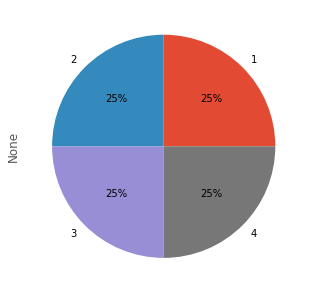

In [10]:
train_data.groupby(train_data.label).size().plot.pie(subplots=True,figsize=(5, 10),autopct="%.0lf%%")

In [11]:
doc = nlp("Donald Trump called and asked me to serve as his running mate and Vice Presidential nominee.")

In [12]:
for tok in doc:
    print(tok.pos_)

PROPN
PROPN
VERB
CCONJ
VERB
PRON
PART
VERB
ADP
DET
NOUN
NOUN
CCONJ
PROPN
PROPN
NOUN
PUNCT


In [13]:
displacy.render(doc, style='dep', jupyter=True, options={'distance': 100})
displacy.render(doc, style='ent', jupyter=True)

In [14]:
text_sports = train_data[train_data.label == 2]

text = " ".join(text_sports.text.tolist())
doc_text = nlp(text[:200000])

In [15]:
import textacy
from textacy.extract import ngrams
from collections import Counter

Counter([ng.text.lower() for n in [2,4] for ng in ngrams(doc_text, n)]).most_common(10)

[('gold medal', 61),
 ('united states', 55),
 ('athens olympics', 42),
 ('michael phelps', 36),
 ('new york', 30),
 ('olympic games', 26),
 ('athens games', 25),
 ('red sox', 24),
 ('greek sprinters', 23),
 ('gold medals', 19)]

Textacy can use graph based keyword extraction methods.

* TextRank (focuses on words)
* SingleRank (focueses on phrases)

In [16]:
from textacy import keyterms

keyterms.textrank(
    doc_text,
    normalize = "lemma",
    n_keyterms=10,
)

[('AP),AP', 0.008189614251462717),
 ('olympic', 0.005856340075483898),
 ('ATHENS', 0.005776623105917376),
 ('team', 0.005024010509764872),
 ('Tuesday', 0.004758161809177643),
 ('Olympics', 0.0047250375239738995),
 ('year', 0.004287764820393805),
 ('Wednesday', 0.0041541815498498625),
 ('night', 0.00410184596790835),
 ('gold', 0.004018000239886912)]

In [17]:
textacy.keyterms.singlerank(
    doc_text,
    normalize = "lemma",
    n_keyterms=10,
)

[('team gold medal Tuesday night', 0.029375315809535497),
 ('relay olympic gold medal Wednesday', 0.02656967986566791),
 ('day event olympic gold medal', 0.02578035200607848),
 ('olympic tennis gold medal', 0.022141386201850223),
 ('fourth consecutive olympic gold medal', 0.022045417213610783),
 ('time trial gold medal Wednesday', 0.021929117238696137),
 ('straight olympic softball gold medal', 0.02178907195692946),
 ('olympic swimming gold medal', 0.021473122890666992),
 ('possible eight olympic gold medal', 0.021428244544023763),
 ('United States olympic basketball team', 0.02119472238095858)]

Extract entities from the doc:

In [22]:
import math
from collections import Counter 
words = [tok for tok in doc_text if tok.is_alpha and not tok.is_stop]
word_probs = {tok.text.lower(): tok.prob for tok in words}

freqs = Counter(tok.text for tok in words)

In [19]:
from wordcloud import WordCloud
print(len(freqs))
wordcloud = WordCloud(background_color="white", max_words=30, scale=1.5).generate_from_frequencies(freqs)
image = wordcloud.to_image()
image.save("./wordcloud.png")

5589


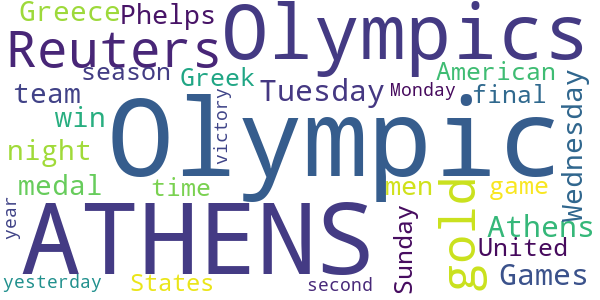

In [20]:
from IPython.display import Image 
Image(filename='./wordcloud.png')

In [23]:
sample_df = train_data.groupby('label').apply(lambda x: x.sample(frac=0.2))

We add a new column to the table which will contain the cleaned and preprocessed text

In [ ]:
from tqdm import tqdm

clean_text = []
for text in tqdm(sample_df['text']):
    doc = nlp(text)
    words = []
    for tok in doc:
        if not tok.is_stop and tok.is_alpha:
            words.append(tok.lemma_)
    clean_text.append(words)

# Add cleaned text to dataframe
sample_df['clean_text'] = clean_text
sample_df.head()

In [ ]:
# Set variables for dependent and independent variables
labels = sample_df.label.tolist()
data = sample_df['clean_text'].tolist()

In [ ]:
import gensim
from tqdm import tqdm
from sklearn.model_selection import train_test_split as split
import numpy as np

In [ ]:
# We use the pretrained glove embedding
# To handle the Seq2Vec method, we take the mean of the word-vectors
def vectorize(tr_data, tst_data):
    print('\nLoading existing glove model...')
    embedding_file = "glove.6B.100d.txt"

    model = gensim.models.KeyedVectors.load_word2vec_format(embedding_file, binary=False)
    vectorizer = model.wv
    vocab_length = len(model.wv.vocab)
    
    tr_vectors = [
        np.array(np.mean([vectorizer[word] if word in model else np.zeros((100,)) for word in article], axis=0)) for article in tqdm(tr_data,'Vectorizing')
    ]
    
    tst_vectors = [
        np.array(np.mean([vectorizer[word] if word in model else np.zeros((100,)) for word in article], axis=0)) for article in tqdm(tst_data,'Vectorizing')
    ]
    
    return tr_vectors, tst_vectors

In [ ]:
def get_features_and_labels(data, labels):
    tr_data,tst_data,tr_labels,tst_labels = split(data,labels,test_size=0.3)
    
    tst_vecs = []
    tr_vecs = []
    tr_vecs, tst_vecs = vectorize(tr_data, tst_data)    
    return tr_vecs, tr_labels, tst_vecs, tst_labels

In [ ]:
tr_vecs, tr_labels, tst_vecs, tst_labels = get_features_and_labels(data, labels)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

### You can try different classifiers as well
- Multiple are available from [scikit-learn](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

In [ ]:
rf  =  RandomForestClassifier(n_estimators=100, verbose=True, n_jobs=-1)
svc = SVC()
lr  = LogisticRegression(n_jobs=-1)

In [ ]:
rf.fit(tr_vecs, tr_labels)
svc.fit(tr_vecs, tr_labels)
lr.fit(tr_vecs, tr_labels)

In [ ]:
from sklearn.metrics import accuracy_score
print(type(tst_vecs))
rf_pred = rf.predict(tst_vecs)
svc_pred = svc.predict(tst_vecs)
lr_pred = lr.predict(tst_vecs)
print("Random Forest Test accuracy : {}".format(accuracy_score(tst_labels, rf_pred)))
print("SVC Test accuracy : {}".format(accuracy_score(tst_labels, svc_pred)))
print("Logistic Regression Test accuracy : {}".format(accuracy_score(tst_labels, lr_pred)))

# Building a Deep Learning model with pytorch and torchtext

## Recurrent neural networks

In NLP, recurrent neural networks (RNN) are commonly used to analyse sequences. It takes in a sequence of words, one at a time, and produces hidden states ($h$) after each steps. RNN-s are used recurrently by feeding in the current word and the hidden state from the previous word.

Once we have our final hidden state, $h_T$, (from feeding in the last word in the sequence, $x_T$) we feed it through a linear layer, $f$ (fully connected layer) to reduce the dimension into the dimension of the labels.

![rnn](https://github.com/bentrevett/pytorch-sentiment-analysis/raw/79bb86abc9e89951a5f8c4a25ca5de6a491a4f5d/assets/sentiment1.png)

_(image from bentrevett)_


![rnn2](https://miro.medium.com/max/1400/1*WMnFSJHzOloFlJHU6fVN-g.gif)

One of the biggest problem of recurrent neural networks is the vanishing gradient problem. It happens when the gradient shrinks during bakcpropagarion. If it becomes very small, the network stops learning. This mostly happen when long sentences are present. LSTM networks address this problem by having an inner memory cell to remember important information or forget others.

![lstm](https://miro.medium.com/max/1400/1*S0rXIeO_VoUVOyrYHckUWg.gif)

_(images from [link](https://towardsdatascience.com/illustrated-guide-to-lstms-and-gru-s-a-step-by-step-explanation-44e9eb85bf21))_


In [ ]:
test_data.to_csv("dataset_test.csv", index=False)
train_data.to_csv("dataset_train.csv", index=False)

## Data loading

Pytorch has a special framework to work with textual data, called [TorchText](https://pytorch.org/text/), it has a lot of useful built in methods and datasets.

The Field class is one of the main concepts of TorchText.

The parameters of a Field specify how the data should be processed.

The TEXT field describes how the articles need to be processed, also the LABEL field is to process the label of the articles.

We can pass tokenize='spacy' to our tokenizer to use spacy's methods. The default tokenizer would be splitting on spaces.

LABEL is defined by a LabelField, a special subset of the Field class specifically used for handling labels.

For more on [Fields](https://torchtext.readthedocs.io/en/latest/data.html)

Random seeds are used for reproducibility.

In [27]:
SEED = 1234

torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

TEXT = data.Field(tokenize = 'spacy')
LABEL = data.LabelField(dtype = torch.long)

In [28]:
fields = [('label',LABEL),('text', TEXT)]

train, test = data.TabularDataset.splits(
                                        path = '.',
                                        train = 'dataset_train.csv',
                                        test = 'dataset_test.csv',
                                        format = 'csv',
                                        fields = fields,
                                        skip_header = True
)

In [29]:
print(vars(train.examples[0]))

{'label': '3', 'text': ['Wall', 'St.', 'Bears', 'Claw', 'Back', 'Into', 'the', 'Black', '(', 'Reuters),Reuters', '-', 'Short', '-', 'sellers', ',', 'Wall', 'Street', "'s", 'dwindling\\band', 'of', 'ultra', '-', 'cynics', ',', 'are', 'seeing', 'green', 'again', '.']}


In [30]:
import random

train, valid = train.split(random_state = random.seed(SEED))

In [31]:
print(f'Number of training examples: {len(train)}')
print(f'Number of validation examples: {len(valid)}')
print(f'Number of testing examples: {len(test)}')

Number of training examples: 84000
Number of validation examples: 36000
Number of testing examples: 7600


Building vocabulary is an essential step to handle textual data. This is a lookup table where every unique word has a corresponding index.

This is done so our machine learning model can operate on numbers instead of strings. The indexes are then used to construct embeddings for our words.

In [32]:
TEXT.build_vocab(train, vectors ="glove.6B.100d")  
LABEL.build_vocab(train)

In [ ]:
print(TEXT.vocab.stoi)

In [34]:
print(TEXT.vocab.freqs.most_common(20))

[(',', 177632), ('the', 124377), ('.', 92521), ('to', 82745), ('-', 78124), ('a', 68811), ('of', 68382), ('in', 65005), ('and', 47989), ('on', 39003), ('for', 34221), ('#', 32709), ('(', 28193), (' ', 26862), ('39;s', 21662), ('that', 19074), ('with', 17014), ('The', 16932), ('as', 16671), (')', 16376)]


We have a special unknown or <unk> token. For example, if the sentence was "This film is great and I love it" but if the word "love" is not in the vocab, it would become "This film is great and I <unk> it".
    
We feed batches into our model. And we feed one batch at a time. Within a batch all sentences need to be in the same size. We need to ensure that each sentence in the batch is the same size, and the shorter ones are padded.

![pad](https://github.com/bentrevett/pytorch-sentiment-analysis/raw/79bb86abc9e89951a5f8c4a25ca5de6a491a4f5d/assets/sentiment6.png)

_(image from bentrevett)_


In [35]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [36]:
BATCH_SIZE = 64

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits((train, valid, test), batch_size = BATCH_SIZE,
                                                                           sort_key = lambda x: len(x.text),
                                                                           sort_within_batch = False,
                                                                           device = device)

Each batch, text, is a tensor of size [sentence length, batch size]. 

The input batch is then passed through the embedding layer to get word embeddings.
Then, the embedded is then fed into the LSTM..

The LSTM returns 2 tensors, output of size [sentence length, batch size, hidden dim] and hidden of size [1, batch size, hidden dim]. We take the last layer of the output.

Finally, we feed the last hidden state, hidden, through the linear layer, fc, to produce a prediction.

In [152]:
import torch.nn as nn
from torch import autograd

class LSTMClassifier(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim):
        
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.embedding.weight.data.copy_(TEXT.vocab.vectors)
        self.embedding.weight.requires_grad=False
        
        self.lstm = nn.LSTM(embedding_dim, hidden_dim)
        
        self.fc = nn.Linear(hidden_dim, output_dim)

        
    def forward(self, text):

        #text = [sent len, batch size]
        
        embedded = self.embedding(text)
        
        #embedded = [sent len, batch size, emb dim]
        
        output, hidden = self.lstm(embedded)

        y = self.fc(output[-1])
        
        log_probs = F.log_softmax(y.squeeze(0))
        return log_probs

In [153]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 100
HIDDEN_DIM = 100
OUTPUT_DIM = 4

model = LSTMClassifier(INPUT_DIM, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM)

In [154]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [155]:
criterion = nn.NLLLoss()

In [156]:
model = model.to(device)
criterion = criterion.to(device)

In [157]:
from sklearn.metrics import classification_report
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    #round predictions to the closest integer
    rounded_preds = preds.argmax(1)
    correct = (rounded_preds == y).float() #convert into float for division 
    #target_names = ['class 0', 'class 1', 'class 2', 'class 3']
    #print(classification_report(rounded_preds.cpu().numpy(), y.cpu().numpy(), target_names=target_names))
    acc = correct.sum() / len(correct)
    return acc

In [158]:
from sklearn.metrics import accuracy_score
import torch.nn.functional as F
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
        
        optimizer.zero_grad()
                
        predictions = model(batch.text)

        loss = criterion(predictions, batch.label)
        
        acc = binary_accuracy(predictions, batch.label)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [159]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:
            predictions = model(batch.text)
            loss = criterion(predictions, batch.label)
            
            acc = binary_accuracy(predictions, batch.label)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [160]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [161]:
N_EPOCHS = 15

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

/userhome/student/adaamko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 01 | Epoch Time: 0m 7s
	Train Loss: 1.359 | Train Acc: 29.55%
	 Val. Loss: 1.364 |  Val. Acc: 26.20%
Epoch: 02 | Epoch Time: 0m 7s
	Train Loss: 1.241 | Train Acc: 37.62%
	 Val. Loss: 0.934 |  Val. Acc: 58.61%
Epoch: 03 | Epoch Time: 0m 7s
	Train Loss: 0.753 | Train Acc: 69.98%
	 Val. Loss: 0.707 |  Val. Acc: 78.34%
Epoch: 04 | Epoch Time: 0m 7s
	Train Loss: 0.514 | Train Acc: 82.68%
	 Val. Loss: 0.712 |  Val. Acc: 76.46%
Epoch: 05 | Epoch Time: 0m 7s
	Train Loss: 0.434 | Train Acc: 85.54%
	 Val. Loss: 0.596 |  Val. Acc: 81.43%
Epoch: 06 | Epoch Time: 0m 7s
	Train Loss: 0.400 | Train Acc: 86.36%
	 Val. Loss: 0.515 |  Val. Acc: 84.36%
Epoch: 07 | Epoch Time: 0m 7s
	Train Loss: 0.377 | Train Acc: 87.03%
	 Val. Loss: 0.495 |  Val. Acc: 83.98%
Epoch: 08 | Epoch Time: 0m 7s
	Train Loss: 0.357 | Train Acc: 87.72%
	 Val. Loss: 0.453 |  Val. Acc: 85.45%
Epoch: 09 | Epoch Time: 0m 7s
	Train Loss: 0.338 | Train Acc: 88.35%
	 Val. Loss: 0.463 |  Val. Acc: 85.08%
Epoch: 10 | Epoch Time: 0m 7

In [135]:
model.load_state_dict(torch.load('tut1-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

/userhome/student/adaamko/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Test Loss: 0.363 | Test Acc: 87.35%
